In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


In [2]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료")

PIL 라이브러리 import 완료


In [24]:
#가위바위보 이미지 사이즈를 28 x 28로 바꾸는 함수

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    print(len(images)," images to be resized")
    
    target_size = (28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")
        
    print(len(images)," images resized")

In [25]:
image_dir_path = os.getenv("HOME") + '/aiffel/rock_scissor_paper/scissor'
resize_images(image_dir_path)

print("가위 위미지 resize complete!")

100  images to be resized
100  images resized
가위 위미지 resize complete!


In [26]:
image_dir_path = os.getenv("HOME") + '/aiffel/rock_scissor_paper/rock'
resize_images(image_dir_path)

print("돌 위미지 resize complete!")

100  images to be resized
100  images resized
돌 위미지 resize complete!


In [27]:
image_dir_path = os.getenv("HOME") + '/aiffel/rock_scissor_paper/paper'
resize_images(image_dir_path)

print("보 위미지 resize complete!")

100  images to be resized
100  images resized
보 위미지 resize complete!


In [28]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [29]:
image_dir_path = os.getenv("HOME") + '/aiffel/rock_scissor_paper'
(x_train,y_train) = load_data(image_dir_path)
x_train_norm = x_train / 255.0

print("x_train shape : {}".format(x_train.shape))
print("y_train shape : {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape : (300, 28, 28, 3)
y_train shape : (300,)


라벨 :  0


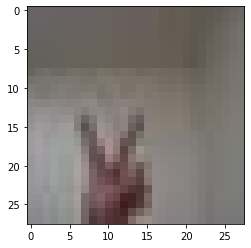

In [30]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print("라벨 : ",y_train[0])

In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [32]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))


model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (

In [34]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8416 - accuracy: 0.7333
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7875 - accuracy: 0.7800
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7423 - accuracy: 0.7800
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7783 - accuracy: 0.7033
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 0.7005 - accuracy: 0.7833
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6510 - accuracy: 0.8133
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6263 - accuracy: 0.8033
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5917 - accuracy: 0.7900
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5835 - accuracy: 0.7733
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5273 - accuracy: 0.8300


# 테스트 데이터로 성능 확인하기

### 테스트 데이터셋 resize 해주기

In [37]:
# 테스트 데이터로 resize 해주기!

image_dir_path = os.getenv("HOME") + '/aiffel/rock_scissor_paper/test/scissor'
resize_images(image_dir_path)

print("가위 위미지 resize complete!")

image_dir_path = os.getenv("HOME") + '/aiffel/rock_scissor_paper/test/paper'
resize_images(image_dir_path)

print("가위 위미지 resize complete!")

image_dir_path = os.getenv("HOME") + '/aiffel/rock_scissor_paper/test/rock'
resize_images(image_dir_path)

print("가위 위미지 resize complete!")

100  images to be resized
100  images resized
가위 위미지 resize complete!
100  images to be resized
100  images resized
가위 위미지 resize complete!
100  images to be resized
100  images resized
가위 위미지 resize complete!


### 훈련용 데이터셋 load하기

In [38]:
image_dir_path = os.getenv("HOME") + '/aiffel/rock_scissor_paper/test'
(x_test,y_test) = load_data(image_dir_path)
x_test_norm = x_train / 255.0

print("x_train shape : {}".format(x_train.shape))
print("y_train shape : {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape : (300, 28, 28, 3)
y_train shape : (300,)


라벨 :  0


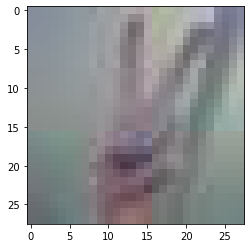

In [40]:
plt.imshow(x_test[0])
print("라벨 : ",y_test[0])

### 훈련시킨 model을 사용하여 test_accuracy를 측정해 봅시다.

In [39]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test,verbose=2)
print(f"test_loss : {test_loss}")
print(f"test_accuracy : {test_accuracy}")

10/10 - 0s - loss: 0.4969 - accuracy: 0.8767
test_loss : 0.4968629479408264
test_accuracy : 0.8766666650772095
